In [116]:
from scipy.stats import bernoulli, binom
from matplotlib import pyplot as plt
import numpy as np

In [117]:
def trials(epsilons, coins, repetitions, bias):
    trials = np.random.binomial(n=1, p=bias, size=(repetitions, coins))
    means = trials.mean(axis=1)

    emp_frequencies = []
    for a in epsilons:
        emp_frequencies.append(np.sum(means >= a) / repetitions)
    
    return emp_frequencies

def markovs_inequality(E, a):
    return E/a 

#return  1/20 * (0 - 0.5)**2 / (a**2)
def chebyshevs_inequality(E, a, n, bias):
    #chebyshevsBound = (bias*(-bias)**2 + (1-bias)*(1 - bias)**2) / (n *a**2)
    #return chebyshevsBound
    variance = E * (1 - E)
    return variance / (n * a**2)

def hoeffdings_inequality(a, n):
	y = np.exp (-2*n*a**2) 
	return y

def plot(emp_frequencies, markovs_inequalities, chebyshevs_inequalities, hoeffdings_inequalities, epsilons, name=None):
    plt.plot(epsilons, emp_frequencies, label="Empirical Frequency")
    plt.plot(epsilons, markovs_inequalities, label="Markovs bound")
    plt.plot(epsilons, chebyshevs_inequalities, label="Chebyshevs bound")
    plt.plot(epsilons, hoeffdings_inequalities, label="Hoeffdings bound")
    plt.xlabel("$\\alpha$")
    plt.ylabel("$\\mathbb{P}(\\frac{1}{20}\\sum_{i=1} ^{20} X_{i} \\geq \\alpha)$")
    plt.legend()
    if name:
        plt.savefig(name)
    plt.show()

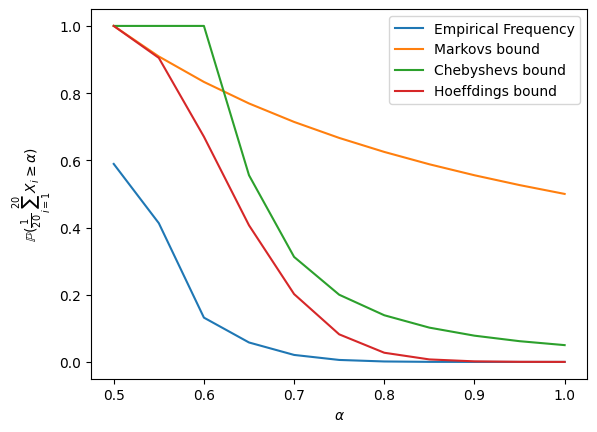

In [118]:
# Granularity in number of a's must be equal to number of coin tosses. The mean can assume len(ass) number of values. For 1 coin, it can be 0 or 1, for 2 coins it can be 0, 0.5 or 1, etc.
epsilons = np.arange(0.5, 1.05, 0.05)
coins = 20
repetitions = 10**6
bias = 0.5
E = bias
mu = bias

emp_frequencies = trials(epsilons, coins, repetitions, bias)

markovs_inequalities = [min(markovs_inequality(E, a), 1.0) for a in epsilons]
chebyshevs_inequalities = [min(chebyshevs_inequality(E, a - mu, coins, bias) if a - mu > 0 else 1, 1.0) for a in epsilons]
hoeffdings_inequalities = [min(hoeffdings_inequality(a - mu, coins), 1.0) for a in epsilons]
plot(emp_frequencies, markovs_inequalities, chebyshevs_inequalities, hoeffdings_inequalities, epsilons, "images/inequalities_05.png")

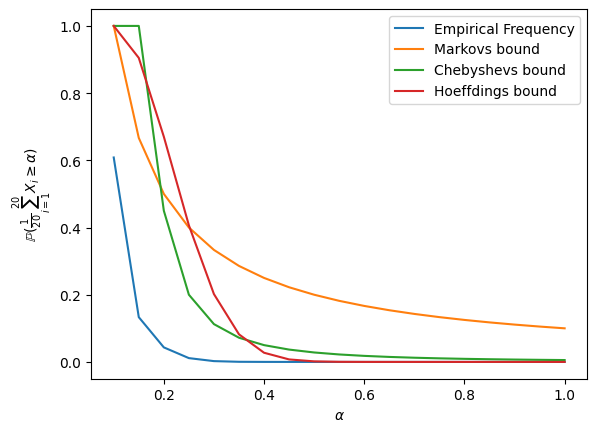

In [119]:
# Granularity in number of a's must be equal to number of coin tosses. The mean can assume len(ass) number of values. For 1 coin, it can be 0 or 1, for 2 coins it can be 0, 0.5 or 1, etc.
epsilons = np.arange(0.1, 1.05, 0.05)
coins = 20
repetitions = 10**6
bias = 0.1
E = bias
mu = bias

emp_frequencies = trials(epsilons, coins, repetitions, bias)

markovs_inequalities = [min(markovs_inequality(E, a), 1.0) for a in epsilons]
chebyshevs_inequalities = [min(chebyshevs_inequality(E, a - mu, coins, bias) if a - mu > 0 else 1, 1.0) for a in epsilons]
hoeffdings_inequalities = [min(hoeffdings_inequality(a - mu, coins), 1.0) for a in epsilons]
plot(emp_frequencies, markovs_inequalities, chebyshevs_inequalities, hoeffdings_inequalities, epsilons, "images/inequalities_01.png")

In [120]:
from math import factorial

def p(n, k, p):
    return (factorial(n) / (factorial(k) * factorial(n-k))) * p**k * (1-p)**(n-k)

n = 20

# p=0.5, n=20, a=1, heads=n*a -> we need 20 heads
p1 = 0.1
a1 = 1
a2 = 0.95
k1 = int(a1 * n)
k2 = int(a2 * n)

r1 = p(n, k1, p1)
r2 = r1 + p(n, k2, p1)

print(r1)
print(r2)



1.0000000000000011e-20
1.810000000000002e-18
